In [116]:
import numpy as np

In [117]:
def confusion_matrix_manual(predicted_labels, ground_truth_labels):
        true_positives = 0
        false_positives = 0
        true_negatives = 0
        false_negatives = 0
        
        for i in range(len(predicted_labels)):
            if predicted_labels[i] == 1 and ground_truth_labels[i] == 1:
                true_positives += 1
            elif predicted_labels[i] == 1 and ground_truth_labels[i] == 0:
                false_positives += 1
            elif predicted_labels[i] == 0 and ground_truth_labels[i] == 0:
                true_negatives += 1
            elif predicted_labels[i] == 0 and ground_truth_labels[i] == 1:
                false_negatives += 1
        
        return true_positives, false_positives, true_negatives, false_negatives

In [118]:
def knn(data, query, k):
    # Calculate Euclidean distance between query point and each data point
    distances = np.sqrt(np.sum((data[:, :-1] - query[:-1])**2, axis=1))
    
    # Sort distances in ascending order and select top k nearest neighbors
    nearest_neighbors = distances.argsort()[:k]
    
    # Count the number of nearest neighbors with a value of 1 and 0 for the last variable
    num_ones = np.count_nonzero(data[nearest_neighbors, -1] == 1)
    num_zeros = np.count_nonzero(data[nearest_neighbors, -1] == 0)
    
    # Determine the label of the query point based on the counts
    if num_ones > num_zeros:
        query_label = 1
    else:
        query_label = 0
    
    return query_label



In [119]:
def calculate_metrics(confusion_matrix):
    true_positives, false_positives, true_negatives, false_negatives = confusion_matrix
    
    accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1_score = 2 * (precision * recall) / (precision + recall)
    
    return accuracy, precision, recall, f1_score



In [120]:
import pandas as pd

# Read the training data from "nba_treino.csv"
nba_treino = pd.read_csv("nba_treino.csv")


# Read the test data from "nba_teste.csv"
nba_teste = pd.read_csv("nba_teste.csv")
for k in [2, 10, 50, 150]:
    predicted_labels = np.zeros(nba_teste.shape[0])
    i = 0

    # Iterate over each row in the test data
    for index, row in nba_teste.iterrows():
        # Get the data from the current row
        query_data = row.values    
        # Call the functions with the data from the training data
        predicted_labels[i] = knn(nba_treino.values, query_data, k)
        i += 1
    confusion_matrix = confusion_matrix_manual(predicted_labels, nba_treino["TARGET_5Yrs"].values)
    accuracy, precision, recall, f1_score = calculate_metrics(confusion_matrix)

    # Print the metrics for the current row
    print(f"Metrics for points with k = {k}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1_score}")
    print()


Metrics for points with k = 2
Accuracy: 0.48507462686567165
Precision: 0.5742574257425742
Recall: 0.3790849673202614
F1 Score: 0.4566929133858268

Metrics for points with k = 10
Accuracy: 0.4925373134328358
Precision: 0.5555555555555556
Recall: 0.5555555555555556
F1 Score: 0.5555555555555556

Metrics for points with k = 50
Accuracy: 0.503731343283582
Precision: 0.5581395348837209
Recall: 0.6274509803921569
F1 Score: 0.5907692307692307

Metrics for points with k = 150
Accuracy: 0.5111940298507462
Precision: 0.563953488372093
Recall: 0.6339869281045751
F1 Score: 0.5969230769230769



In [121]:
def k_means(data, k, max_iterations=100):
    # Initializing centroids randomly
    centroids = data[:,:-1][np.random.randint(data[:,:-1].shape[0], size=k)]
    oldlabels = None

    for  in range(max_iterations):
        # Calculating the distance between the data points and the centroids
        distances = np.linalg.norm(data[:, np.newaxis, :-1] - centroids, axis=-1)

        # Assigning the data points to the cluster that has the closest centroid
        labels = np.argmin(distances, axis=-1)

        # Recalculating the centroids using the mean of each previous cluster
        new_centroids = np.empty((k, data.shape[1]-1))
        for i in range(k):
            new_centroids[i] = data[labels == i, :-1].mean(axis=0)

        # Checking if any point changed its cluster
        if old_labels is not None and np.all(old_labels == labels):
            break

        # Updating centroids and labels for the next iteration
        centroids = new_centroids
        old_labels = labels

    # Creating a list of clusters
    clusters = [data[labels == i] for i in range(k)]


    return centroids, clusters

centroids, clusters = k_means(training.values, 2)
print("Centroids:", centroids)
for i, cluster in enumerate(clusters):
    print(f"Cluster {i}: {cluster}")

SyntaxError: invalid syntax (2381765086.py, line 6)

In [125]:
import matplotlib.pyplot as plt

def k_means(train_data, test_data, k, max_iterations=100):
    # Ignore the last attribute in both train and test data
    train_data = train_data[:, :-1]
    test_data = test_data[:, :-1]
    
    # Step 1: Initialize centroids
    centroid_index = np.random.choice(train_data.shape[0], k, replace=False)
    centroids = train_data[centroid_index]  
    
    # Create an empty dictionary to store the indices of data associated with each centroid
    centroid_indices = {}
    
    for _ in range(max_iterations):
        # Step 2: Assign each data point to the nearest centroid
        test_distances = np.sqrt(np.sum((test_data[:, np.newaxis] - centroids)**2, axis=2))
        test_labels = np.argmin(test_distances, axis=1)
        
        # Step 3: Update the centroids
        new_centroids = np.empty((k, train_data.shape[1]))
        for i in range(k):
            new_centroids[i] = test_data[test_labels == i].mean(axis=0)
        
        # Step 4: Check if any point changed its cluster
        if np.all(test_labels == centroid_indices):
            break
        
        # Step 5: Update the centroids and centroid_indices for the next iteration
        centroids = new_centroids
        
        # Update the centroid_indices dictionary
        for i in range(k):
            centroid_indices[i] = np.where(test_labels == i)[0]
    
    # Plot the centroids and associated points
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', label='Centroids')
    for i in range(k):
        points = test_data[centroid_indices[i]]
        plt.scatter(points[:, 0], points[:, 1], label=f'Points for Centroid {i+1}')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('K-Means Clustering')
    plt.legend()
    plt.show()
    
    return test_labels, centroids, centroid_indices


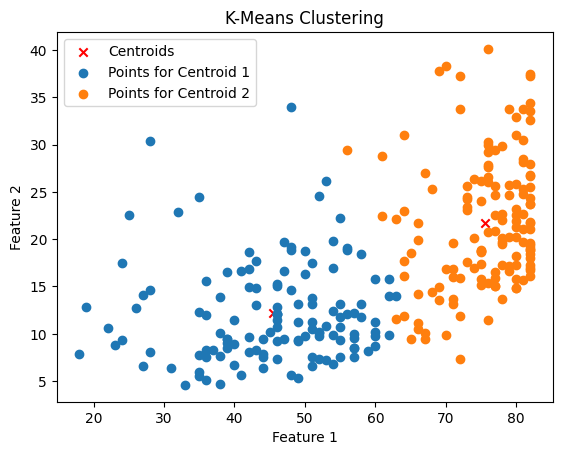

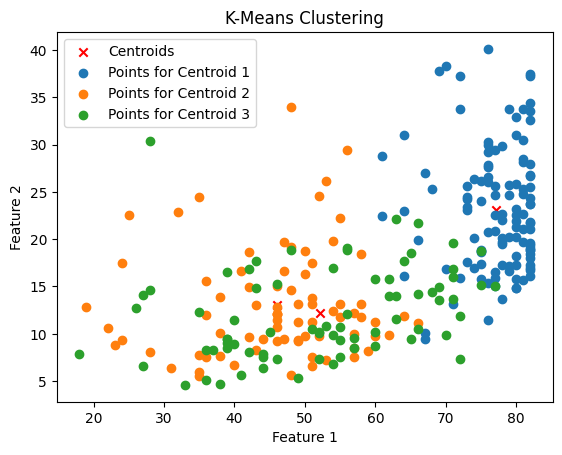

In [126]:
for k in [2, 3]:
    test_labels, centroid_index, centroid_indices = k_means(nba_treino.values, nba_teste.values, k)
    # print(f"Points with k = {k}")
    # print(f"Centroids: {centroid_index}")
    # print()
    # print(f"Centroid indices: {centroid_indices}")
    # print()
    # print(f"Test labels: {test_labels}")
